# TensorFlow Neural Network for Apple Quality Prediction

This notebook demonstrates a neural network using TensorFlow to predict the quality of apples based on given features.
1. Load and preprocess the data
2. Build the neural network model
3. Train the model
4. Evaluate the model
5. Plot training history

In [1]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## 1. Load and Preprocess the Data

In [2]:
def pre_process():
    df = pd.read_csv('../datasets/apple_quality_labels.csv')
    # Split the data
    X = df.drop('Quality', axis=1).values
    y = df['Quality'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convert to TensorFlow datasets
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(len(X_train))
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

    return X_train, X_test, y_train, y_test, train_dataset, test_dataset

X_train, X_test, y_train, y_test, train_dataset, test_dataset = pre_process()


## 2. Build the Neural Network Model

In [3]:
def build_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model((X_train.shape[1],))


C:\Users\peter\Documents\Dev\Ciência de Dados\CD-Grupo5\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3. Train the Model

In [4]:
def train_model(model, train_dataset, test_dataset):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    history = model.fit(train_dataset, epochs=200, validation_data=test_dataset, callbacks=[early_stopping])
    return history

history = train_model(model, train_dataset, test_dataset)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6953 - loss: 0.5819 - val_accuracy: 0.8313 - val_loss: 0.4004
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.8350 - loss: 0.3786 - val_accuracy: 0.8737 - val_loss: 0.3225
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8672 - loss: 0.3011 - val_accuracy: 0.8888 - val_loss: 0.2912
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.8724 - loss: 0.2882 - val_accuracy: 0.8950 - val_loss: 0.2811
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8788 - loss: 0.2855 - val_accuracy: 0.8988 - val_loss: 0.2704
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.8970 - loss: 0.2564 - val_accuracy: 0.9038 - val_loss: 0.2649
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.8982 - loss: 0.2457 - val_accuracy: 0.8963 - val_loss: 0.2643
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8978 - loss: 0.238

## 4. Evaluate the Model

In [5]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    return loss, accuracy

loss, accuracy = evaluate_model(model, X_test, y_test)
print("Accuracy: ", accuracy)
print("Loss: ", loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9443 - loss: 0.1700
Accuracy:  0.9437500238418579
Loss:  0.17007651925086975


## 5. Plot Training History

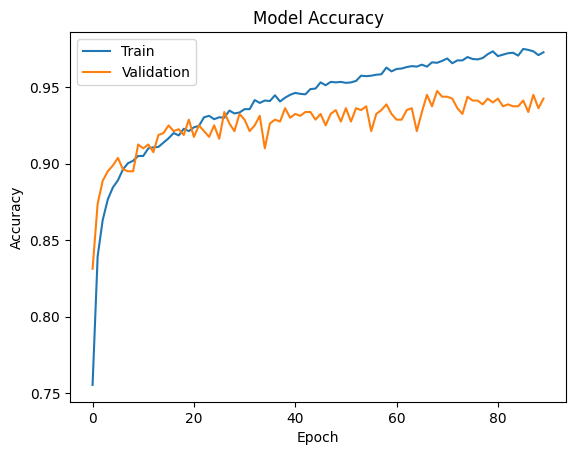

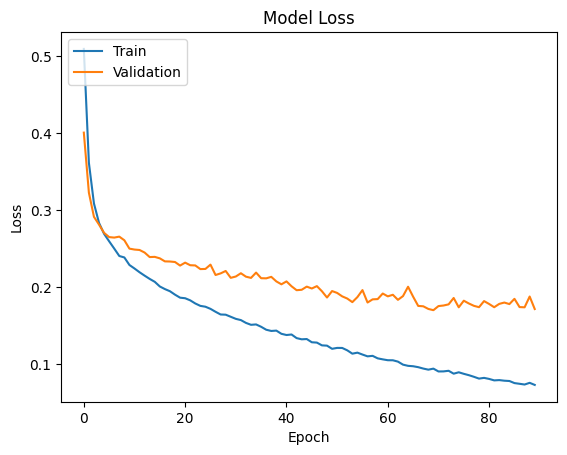

In [6]:
def plot_history(history):
    # Plot accuracy train vs validation
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot loss train vs validation
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_history(history)